In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [3]:
df = pd.read_csv('Melbourne housing.csv')
df = df.drop_duplicates()
print(df.head())
print(df.shape)

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode      ...       Bathroom  Car  Landsize  \
0   3/9/2016       2.5    3067.0      ...            1.0  1.0     126.0   
1  3/12/2016       2.5    3067.0      ...            1.0  1.0     202.0   
2   4/2/2016       2.5    3067.0      ...            1.0  0.0     156.0   
3   4/2/2016       2.5    3067.0      ...            2.0  1.0       0.0   
4   4/3/2017       2.5    3067.0      ...            2.0  0.0     134.0   

   BuildingArea  YearBuilt         CouncilArea Lattitude  Longtitude  \
0           NaN        NaN

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34856 non-null object
Address          34856 non-null object
Rooms            34856 non-null int64
Type             34856 non-null object
Price            27247 non-null float64
Method           34856 non-null object
SellerG          34856 non-null object
Date             34856 non-null object
Distance         34855 non-null float64
Postcode         34855 non-null float64
Bedroom2         26639 non-null float64
Bathroom         26630 non-null float64
Car              26128 non-null float64
Landsize         23046 non-null float64
BuildingArea     13741 non-null float64
YearBuilt        15550 non-null float64
CouncilArea      34853 non-null object
Lattitude        26880 non-null float64
Longtitude       26880 non-null float64
Regionname       34853 non-null object
Propertycount    34853 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.9+ M

In [5]:
#splitting the data

#dropping unnecessary columns
pre_X = df.drop(['Price', 'Address', 'Lattitude', 'Longtitude', 'CouncilArea', 'Method', 'SellerG', 'Date', 'Distance', 
                 'Propertycount', 'Type'], 1)

#getting dummy values for categorical data, and creating dataframe of the independent (predictor) values
X_df = pd.get_dummies(pre_X, columns=['Suburb', 'Regionname'])

#creating dependent variable
Y = df['Price']
#print(X_df.head())
print(X_df.shape)

(34856, 367)


AxesSubplot(0.125,0.125;0.62x0.755)


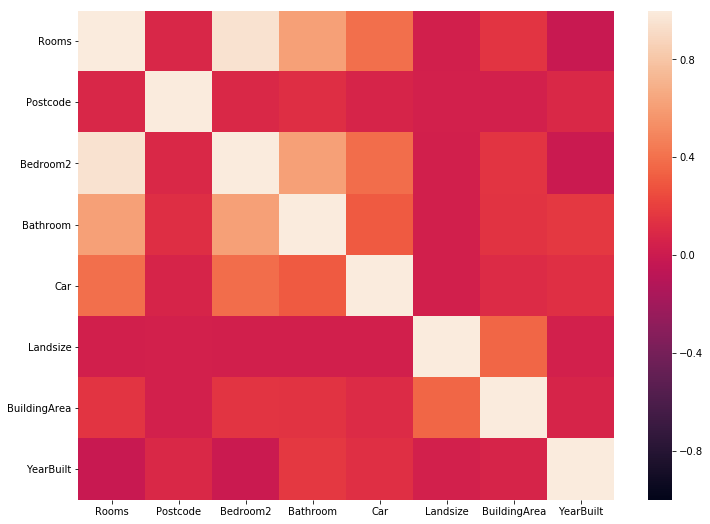

In [6]:
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))


#Creating a heatmap to check for any correlation between our independent variables
Xvar_heatmap = sns.heatmap(pre_X.corr(), vmin=-1, vmax=1)

print(Xvar_heatmap)

In [18]:
#get a boolean form of dataframe to check if theres any blanks
#np.isnan(X_df)

In [7]:
X_df.isnull().sum()

Rooms                                        0
Postcode                                     1
Bedroom2                                  8217
Bathroom                                  8226
Car                                       8728
Landsize                                 11810
BuildingArea                             21115
YearBuilt                                19306
Suburb_Abbotsford                            0
Suburb_Aberfeldie                            0
Suburb_Airport West                          0
Suburb_Albanvale                             0
Suburb_Albert Park                           0
Suburb_Albion                                0
Suburb_Alphington                            0
Suburb_Altona                                0
Suburb_Altona Meadows                        0
Suburb_Altona North                          0
Suburb_Ardeer                                0
Suburb_Armadale                              0
Suburb_Ascot Vale                            0
Suburb_Ashbur

In [8]:
#taking care of missing data

#fixing missing data in Bedroom2 column
X_df['Bedroom2'].ffill(axis=0, inplace=True)
print('Null values in Bedroom2 column: ', X_df['Bedroom2'].isnull().sum())

#fixing missing data in Bathroom column
X_df['Bathroom'].ffill(axis=0, inplace=True)
print('Null values in Bathroom column: ', X_df['Bathroom'].isnull().sum())

#fixing missing data in Car column
X_df['Car'].ffill(axis=0, inplace=True)
print('Null values in Car column: ', X_df['Car'].isnull().sum())


#fixing missing data in postcode column
X_df['Postcode'].ffill(axis=0, inplace=True)
print('Null values in Postcode column: ', X_df['Postcode'].isnull().sum())

#fixing missing data in YearBuilt column
X_df['YearBuilt'].bfill(axis=0, inplace=True)
print('Null values in YearBuilt column: ', X_df['YearBuilt'].isnull().sum())

#fixing missing data in Regionname column
#X_df['Regionname'].ffill(axis=0, inplace=True)
#print('Null values in Regionname column: ', X_df['Regionname'].isnull().sum())

#fixing missing data in property count column
#X_df['Propertycount'].bfill(axis=0, inplace=True)
#print('Null values in Propertycount column: ', X_df['Propertycount'].isnull().sum())

#fixing missing data in Landsize and BuildingArea columns
X_df['Landsize'].fillna(np.mean(X_df['Landsize']), inplace=True)
X_df['BuildingArea'].fillna(np.mean(X_df['BuildingArea']), inplace=True)

Null values in Bedroom2 column:  0
Null values in Bathroom column:  0
Null values in Car column:  0
Null values in Postcode column:  0
Null values in YearBuilt column:  0


In [9]:
df_null_values = X_df.isnull().sum().sum()

print('Total Null values in dataframe after fixing missing data: ', df_null_values)

Total Null values in dataframe after fixing missing data:  0


In [10]:
#creating a new feature by Recoding the year built column to reflect and compare the age of the houses.
X_df['PropertyAge'] = 2019 - X_df['YearBuilt']



#Recoding our Type column from a categorcial to a numeric column.
#X_df['Type'] = X_df['Type'].map({'h':1, "u":2, "t":3})

#changing the variables with type float to type int
X_df['BuildingArea'] = X_df['BuildingArea'].astype(int)
X_df['YearBuilt'] = X_df['YearBuilt'].astype(int)
#X_df['Propertycount'] = X_df['Propertycount'].astype(int)
X_df['Landsize'] = X_df['Landsize'].astype(int)
X_df['Postcode'] = X_df['Postcode'].astype(int)
X_df['PropertyAge'] = X_df['PropertyAge'].astype(int)
X_df['Bedroom2'] = X_df['Bedroom2'].astype(int)
X_df['Bathroom'] = X_df['Bathroom'].astype(int)
X_df['PropertyAge'] = X_df['PropertyAge'].astype(int)
X_df['Car'] = X_df['Car'].astype(int)


print(X_df.head())

   Rooms  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
0      2      3067         2         1    1       126           160   
1      2      3067         2         1    1       202           160   
2      2      3067         2         1    0       156            79   
3      3      3067         3         2    1         0           160   
4      3      3067         3         2    0       134           150   

   YearBuilt  Suburb_Abbotsford  Suburb_Aberfeldie     ...       \
0       1900                  1                  0     ...        
1       1900                  1                  0     ...        
2       1900                  1                  0     ...        
3       1900                  1                  0     ...        
4       1900                  1                  0     ...        

   Suburb_viewbank  Regionname_Eastern Metropolitan  \
0                0                                0   
1                0                                0   
2    

In [21]:
np.where(X_df.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [22]:
#initial set of train and test groups, before applying SelectKBest and PCA.

train_X, test_X, train_Y, test_Y = train_test_split(X_df, Y, test_size=.3, random_state=10)

In [23]:
#set start time
start_time_rforest = datetime.datetime.now()

#initialize and fit the the first random forest regression model using full data.
forest_regr = ensemble.RandomForestRegressor()
forest_regr.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
y_pred_rforest = forest_regr.predict(test_X)

#get accuracy score from our model
print('Accuracy score for Random Forest regression Model: ' + str(metrics.accuracy_score(test_Y, y_pred_rforest)))

#calculate end time
end_time_rforest = datetime.datetime.now()

#get average accuracy score of our random forest through cross validation
rforest_cvs = cross_val_score(forest_regr, X_df, Y, cv=5, scoring='accuracy')
print(rforest_cvs)
print('Average cross validated score from our Random Forest Model is: ' + str(np.mean(rforest_cvs)))

C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#print(X_df.Regionname.value_counts(dropna=False))
#converting the categorical values in regionname to numerical

#X['Regionname'] = X["Regionname"].map({'Southern Metropolitan':1, "Northern Metropolitan":2, "Western Metropolitan":3,
#                                       "Eastern Metropolitan":4, "South-Eastern Metropolitan":5, "Eastern Victoria":6,
#                                        "Northern Victoria":7, "Western Victoria":8})
#print(X['Regionname'])


In [ ]:
#create a parigrid to check the relationship of the indepependent variables.
#g = sns.PairGrid(df)
#g = g.map(plt.scatter)

In [ ]:
#plotting the relationship between the independent and dependent variables, as well as the histograpsh of independent variables.
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x = new_df['ClumpThickness'], y = new_df['Class'], color='blue')
plt.ylabel('Values')
plt.title('Relationship between ClumpThickness and Class')

plt.subplot(1, 2, 2)
plt.hist(new_df['ClumpThickness'], color='green')
plt.axvline(new_df['ClumpThickness'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(new_df['ClumpThickness'].mean() + new_df['ClumpThickness'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(new_df['ClumpThickness'].mean()- new_df['ClumpThickness'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.ylabel('values')
plt.title('ClumpThickness')

plt.tight_layout()
#plt.show()